# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](img/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

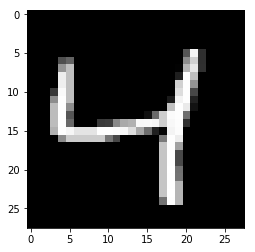

In [6]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Auto - encoder Arch](img/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [43]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

# Input and target placeholders
inputs_ = tf.placeholder(dtype=tf.float32, shape=(None,784,))
targets_ = tf.placeholder(dtype=tf.float32, shape=(None, 784,))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, 784, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [44]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [45]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6942
Epoch: 1/20... Training loss: 0.6911
Epoch: 1/20... Training loss: 0.6884
Epoch: 1/20... Training loss: 0.6849
Epoch: 1/20... Training loss: 0.6807
Epoch: 1/20... Training loss: 0.6765
Epoch: 1/20... Training loss: 0.6697
Epoch: 1/20... Training loss: 0.6627
Epoch: 1/20... Training loss: 0.6538
Epoch: 1/20... Training loss: 0.6442
Epoch: 1/20... Training loss: 0.6331
Epoch: 1/20... Training loss: 0.6213
Epoch: 1/20... Training loss: 0.6074
Epoch: 1/20... Training loss: 0.5911
Epoch: 1/20... Training loss: 0.5744
Epoch: 1/20... Training loss: 0.5600
Epoch: 1/20... Training loss: 0.5419
Epoch: 1/20... Training loss: 0.5240
Epoch: 1/20... Training loss: 0.5071
Epoch: 1/20... Training loss: 0.4849
Epoch: 1/20... Training loss: 0.4698
Epoch: 1/20... Training loss: 0.4512
Epoch: 1/20... Training loss: 0.4318
Epoch: 1/20... Training loss: 0.4195
Epoch: 1/20... Training loss: 0.4059
Epoch: 1/20... Training loss: 0.3921
Epoch: 1/20... Training loss: 0.3757
E

Epoch: 2/20... Training loss: 0.1786
Epoch: 2/20... Training loss: 0.1826
Epoch: 2/20... Training loss: 0.1785
Epoch: 2/20... Training loss: 0.1802
Epoch: 2/20... Training loss: 0.1797
Epoch: 2/20... Training loss: 0.1878
Epoch: 2/20... Training loss: 0.1832
Epoch: 2/20... Training loss: 0.1695
Epoch: 2/20... Training loss: 0.1762
Epoch: 2/20... Training loss: 0.1835
Epoch: 2/20... Training loss: 0.1716
Epoch: 2/20... Training loss: 0.1768
Epoch: 2/20... Training loss: 0.1801
Epoch: 2/20... Training loss: 0.1756
Epoch: 2/20... Training loss: 0.1737
Epoch: 2/20... Training loss: 0.1825
Epoch: 2/20... Training loss: 0.1718
Epoch: 2/20... Training loss: 0.1744
Epoch: 2/20... Training loss: 0.1762
Epoch: 2/20... Training loss: 0.1802
Epoch: 2/20... Training loss: 0.1837
Epoch: 2/20... Training loss: 0.1813
Epoch: 2/20... Training loss: 0.1813
Epoch: 2/20... Training loss: 0.1694
Epoch: 2/20... Training loss: 0.1730
Epoch: 2/20... Training loss: 0.1811
Epoch: 2/20... Training loss: 0.1788
E

Epoch: 3/20... Training loss: 0.1454
Epoch: 3/20... Training loss: 0.1442
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1452
Epoch: 3/20... Training loss: 0.1406
Epoch: 3/20... Training loss: 0.1437
Epoch: 3/20... Training loss: 0.1476
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1452
Epoch: 3/20... Training loss: 0.1416
Epoch: 3/20... Training loss: 0.1447
Epoch: 3/20... Training loss: 0.1430
Epoch: 3/20... Training loss: 0.1462
Epoch: 3/20... Training loss: 0.1446
Epoch: 3/20... Training loss: 0.1373
Epoch: 3/20... Training loss: 0.1462
Epoch: 3/20... Training loss: 0.1495
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1431
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1414
Epoch: 3/20... Training loss: 0.1417
Epoch: 3/20... Training loss: 0.1475
Epoch: 3/20... Training loss: 0.1418
Epoch: 3/20... Training loss: 0.1392
Epoch: 3/20... Training loss: 0.1436
E

Epoch: 3/20... Training loss: 0.1261
Epoch: 3/20... Training loss: 0.1236
Epoch: 3/20... Training loss: 0.1262
Epoch: 3/20... Training loss: 0.1297
Epoch: 3/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1249
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1259
Epoch: 4/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1303
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1260
Epoch: 4/20... Training loss: 0.1225
Epoch: 4/20... Training loss: 0.1221
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1279
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1216
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1235
E

Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1181
Epoch: 4/20... Training loss: 0.1170
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1150
Epoch: 4/20... Training loss: 0.1191
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1152
Epoch: 4/20... Training loss: 0.1116
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1182
Epoch: 4/20... Training loss: 0.1141
Epoch: 4/20... Training loss: 0.1178
Epoch: 4/20... Training loss: 0.1139
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1134
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1201
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1171
E

Epoch: 5/20... Training loss: 0.1119
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1056
Epoch: 5/20... Training loss: 0.1064
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1061
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1084
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1087
Epoch: 5/20... Training loss: 0.1097
E

Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1062
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1075
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1059
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1077
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.0986
E

Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0997
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1027
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.1055
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0959
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.0978
E

Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0939
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.1026
Epoch: 8/20... Training loss: 0.0989
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.1006
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0970
E

Epoch: 9/20... Training loss: 0.0985
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.1008
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0981
Epoch: 9/20... Training loss: 0.0922
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.1025
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0939
Epoch: 9/20... Training loss: 0.0995
Epoch: 9/20... Training loss: 0.0941
E

Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0996
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.1004
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0899
Epoch: 10/20... Training loss: 0.1005
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0929
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0980
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0995
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0907
Epoch: 12/20... Training loss: 0.0920
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0919
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0973
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0914
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0979
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0913
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0994
Epoch: 14/20... Training loss: 0.0896
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0943
Epoch: 14/20... Training loss: 0.0899
Epoch: 14/20... Training loss: 0.0962
Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0945
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0962
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0996
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0938
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0979
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0965
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0970
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0966
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0985
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0983
Epoch: 16/20... Training loss: 0.0919
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0942
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0932
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0941
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0892
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20... Training loss: 0.0908
Epoch: 19/20... Training loss: 0.0937
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0884
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0898
Epoch: 19/20... Training loss: 0.0922
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0960
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0907
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0926
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0966
Epoch: 20/20... Training loss: 0.0945
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

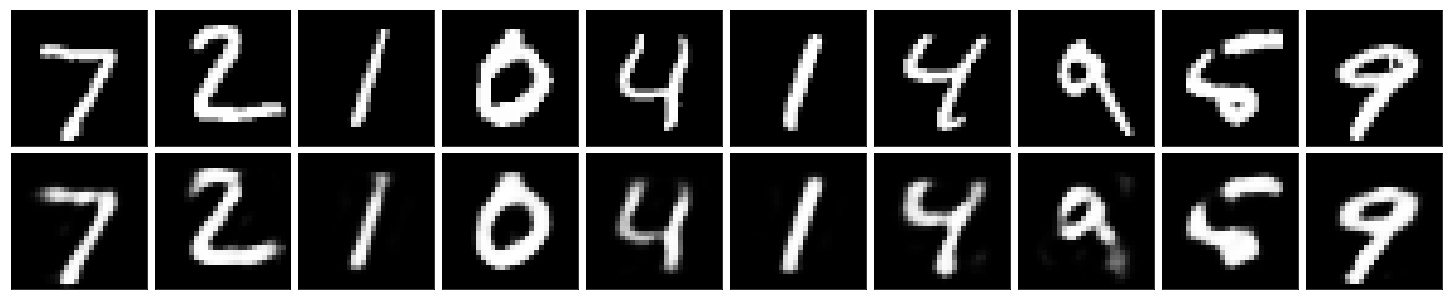

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [35]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.